# COGS 108 - EDA Checkpoint

# Names

- Alex Cheng
- Samarth Arora
- Terence Ting
- Thomas Kolinek
- Yicong Guo

<a id='research_question'></a>
# Research Question

Is there a relationship between the popularity of one's major and the employment rate of related fields of work requiring a degree in that particular major?

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

all_ages = pd.read_csv("https://raw.githubusercontent.com/Terence2018/group048/master/all-ages.csv")
recent_grads = pd.read_csv("https://raw.githubusercontent.com/Terence2018/group048/master/recent-grads.csv")
grad_students = pd.read_csv("https://raw.githubusercontent.com/Terence2018/group048/master/grad-students.csv")


# Data Cleaning

In [2]:
#Here we remove some of the columns from recent_grads that do not pertain to our question, including:
#ShareWomen, Median, P25th, and P75th
trim_recent_grads = recent_grads.drop(['ShareWomen', 'Median', 'P25th', 'P75th'], axis=1)

#Here we remove some of the columns from grad_students that are not relevant to our future analysis.
#Grad_median, Grad_P25, Grad_P75, Nongrad_median, Nongrad_P25, and Nongrad_P75
trim_grad_students = grad_students.drop(['Grad_median', 'Grad_P25', 'Grad_P75', 'Nongrad_median', 'Nongrad_P25', 'Nongrad_P75', 'Grad_share', 'Grad_premium'], axis=1)

#checking for null values in the datasets
print(all_ages.isnull().sum().sum())
print(trim_grad_students.isnull().sum().sum())
trim_recent_grads.isnull().sum()

0
0


Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [3]:
#checking which value has null
trim_recent_grads[trim_recent_grads['Total'].isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,36,3149,2558,1121,1735,338,0.096931,1183,1274,485


In [4]:
#Removes the null row from the dataset and confirms its removal
trim_recent_grads = trim_recent_grads.drop(trim_recent_grads.index[21])
trim_recent_grads.isnull().sum().sum()

0

# Data Analysis & Results (EDA)

After exploring our data in the charts below, we have come to the following conclusions:

##### Structure
The format of our datasets are CSV files each with a varying amount of columns. While each dataset includes specific columns pertaining to their contents, they all contain certain columns which could be used as an index including `Major_code`, `Major`, and `Major_category`. This would be helpful if we wanted to merge and compare the differences in employment circumstances across the different age ranges that our datasets provide.

##### Granularity
The datasets we have all have group-level granularity as they do not contain information on any individual student and their employment status, but instead have counts of grad students grouped by major. These datasets provide summaries of majors by counting the number of grad students present, giving us the popularity of that particular major as well as the counts of differing employment statuses. 

##### Scope
The data we have now are helpful with respect to our research question as it provides an entire list of majors of differing popularities, allowing us to chart the differences in employment statuses across a variety of college majors. Furthermore, these datasets also provide major categories so we can explore how different majors within the same field compare to one another in terms of grad student employment status.

##### Temporality
After exploring our data, we have noticed that, although the dataset covers the years 2010 to 2012, the datasets themselves do not differentiate between data by year. This means that it is difficult to make comparisons between changes in popularity and unemployment counts as all we can do currently is to compare ratios between the total counts in a particular major and the four possible job circumstances a grad student may be in.

##### Faithfulness
We have also noticed that some of the columns seem unclear in their descriptions. For example, the `Employed` might be assumed to contain the total counts of all grads who are employed, but `College_jobs` + `Non_college_jobs` + `Low_wage_jobs` does not add up to the value found in `Employed`. Instead, a closer calculation would be adding `Full_time` and `Part_time` counts, but even then the counts do not match exactly. 

### Comparing Employment Circumstances for `recent_grads`

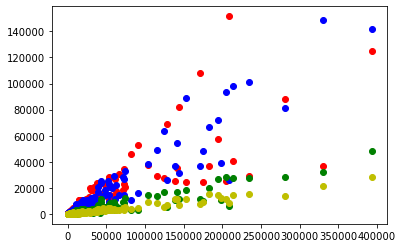

In [5]:
#Comparing the amount of 'College jobs', 'Non college jobs', and 'Low wage jobs' in majors according to their popularity

trim_recent_grads = trim_recent_grads.sort_values(by='Total')

x=trim_recent_grads['Total']
plt.scatter(x, trim_recent_grads['College_jobs'], color='r')
plt.scatter(x, trim_recent_grads['Non_college_jobs'], color='b')
plt.scatter(x, trim_recent_grads['Low_wage_jobs'], color='g')
plt.scatter(x, trim_recent_grads['Unemployed'], color='y')

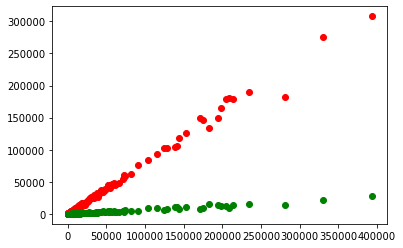

In [6]:
#comparing the counts for employed grads and umployed grads by a major's popularity

plt.scatter(x, trim_recent_grads['Employed'], color='r')
plt.scatter(x, trim_recent_grads['Unemployed'], color='g')

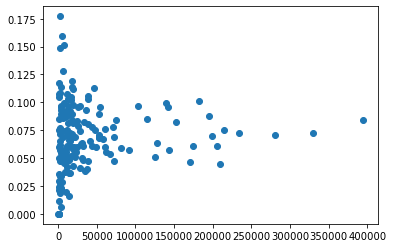

In [7]:
#comparing unemployment rates and major popularity

plt.scatter(x, trim_recent_grads['Unemployment_rate'])

In [8]:
#Splitting the trim_recent_grads datasets into a 'Most popular' and 'Less popular' categories 
print(trim_recent_grads['Total'].max())
print(trim_recent_grads['Total'].min())
print(trim_recent_grads['Total'].max()/4)

top_recent_grads = trim_recent_grads[trim_recent_grads['Total'] > 98433.75]
lower_recent_grads = trim_recent_grads[trim_recent_grads['Total'] < 98433.75]
print(len(top_recent_grads))
print(len(lower_recent_grads))

393735.0
124.0
98433.75
20
152


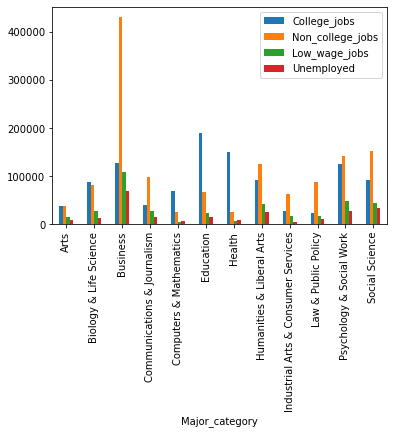

In [9]:
#Grouping the more popular majors by major category and plotting the counts for job circumstances.
top_recent_grads.groupby('Major_category').sum()[['College_jobs',
                                                  'Non_college_jobs',
                                                  'Low_wage_jobs',
                                                  'Unemployed']].plot(kind='bar')

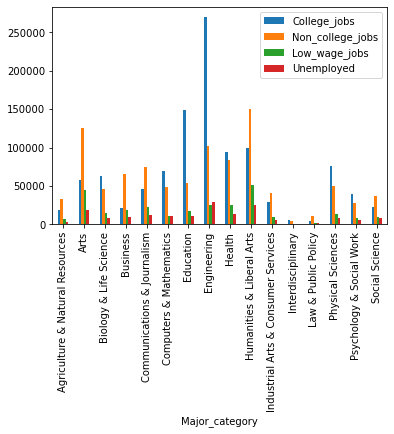

In [10]:
#Grouping the less popular majors by major category and plotting the counts for job circumstances.
lower_recent_grads.groupby('Major_category').sum()[['College_jobs',
                                                    'Non_college_jobs',
                                                    'Low_wage_jobs',
                                                    'Unemployed']].plot(kind='bar')

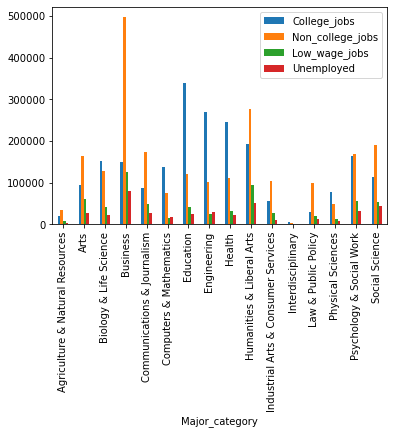

In [11]:
#Grouping the total majors by major category and plotting the counts for job circumstances.
recent_grads.groupby('Major_category').sum()[['College_jobs',
                                              'Non_college_jobs',
                                              'Low_wage_jobs',
                                              'Unemployed']].plot(kind='bar')

Overall, we see that while there are many grads who go on to take jobs that require their degrees, there are also many grads who go on to work in unrelated fields. For example, the Business major category, as seen in this most recent graph, has more than three times the amount of grads working in non-degree jobs than there are in college jobs. 

In [12]:
outcome, predictors = patsy.dmatrices('Unemployed ~ Total', trim_recent_grads)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Unemployed   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     3242.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):          1.21e-112
Time:                        21:09:33   Log-Likelihood:                -1417.4
No. Observations:                 172   AIC:                             2839.
Df Residuals:                     170   BIC:                             2845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -63.2343     82.858     -0.763      0.4

### Comparing `recent_grads` Dataset, broken down by `Major_category`

In [13]:
trim_recent_grads['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Social Science                          9
Agriculture & Natural Resources         9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

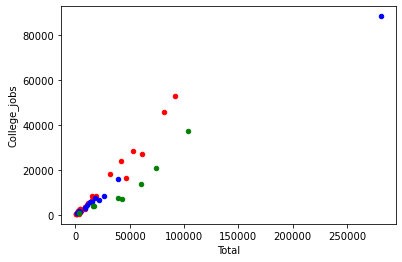

In [14]:
#plotting individual majors and comparing their college jobs, non college jobs, and low paying jobs counts.
engineering = trim_recent_grads[trim_recent_grads['Major_category'] == 'Engineering']
bio = trim_recent_grads[trim_recent_grads['Major_category'] == 'Biology & Life Science']
arts = trim_recent_grads[trim_recent_grads['Major_category'] == 'Arts']

ax1 = engineering.plot(kind='scatter', x='Total', y ='College_jobs', color='r')
ax2 = bio.plot(kind='scatter', x='Total', y='College_jobs', color='b', ax=ax1)
ax3 = arts.plot(kind='scatter', x='Total', y ='College_jobs', color='g', ax=ax1)

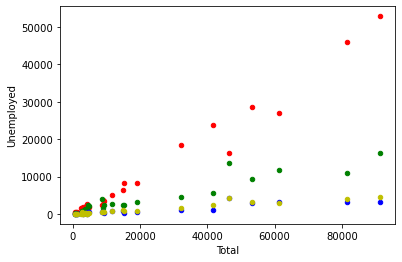

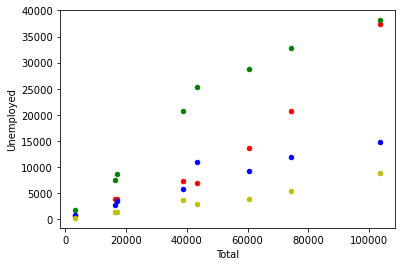

In [15]:
#comparison of engineering majors and their job circumstances
eng1 = engineering.plot(kind='scatter', x='Total', y ='College_jobs', color='r')
eng2 = engineering.plot(kind='scatter', x='Total', y ='Non_college_jobs', color='g', ax=eng1)
eng3 = engineering.plot(kind='scatter', x='Total', y ='Low_wage_jobs', color='b', ax=eng1)
eng4 = engineering.plot(kind='scatter', x='Total', y ='Unemployed', color='y', ax=eng1)

#comparison of art majors and their job circumstances
art1 = arts.plot(kind='scatter', x='Total', y ='College_jobs', color='r')
art2 = arts.plot(kind='scatter', x='Total', y ='Non_college_jobs', color='g', ax=art1)
art3 = arts.plot(kind='scatter', x='Total', y ='Low_wage_jobs', color='b', ax=art1)
art4 = arts.plot(kind='scatter', x='Total', y ='Unemployed', color='y', ax=art1)

Here, we see a difference between the Engineering and Arts majors. In the Engineering major category, we see a higher number of grads taking on jobs that require degrees. However, in the Arts major category, there seems to be a higher number of grads taking on jobs that do not require that particular degree. 



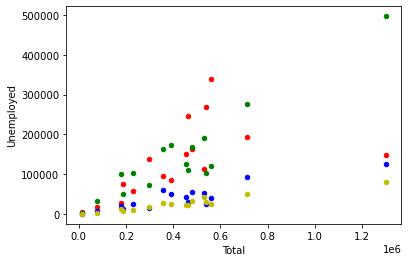

In [16]:
#grouping recent grads by category and comparing their job circumstances
category = trim_recent_grads.groupby('Major_category').sum()
category = category.drop(['Rank', 'Major_code', 'Unemployment_rate'], axis=1)

cat1 = category.plot(kind='scatter', x='Total', y='College_jobs', color='r')
cat2 = category.plot(kind='scatter', x='Total', y='Non_college_jobs', color ='g', ax=cat1)
cat3 = category.plot(kind='scatter', x='Total', y='Low_wage_jobs', color='b', ax=cat1)
cat4 = category.plot(kind='scatter', x='Total', y='Unemployed', color='y', ax=cat1)

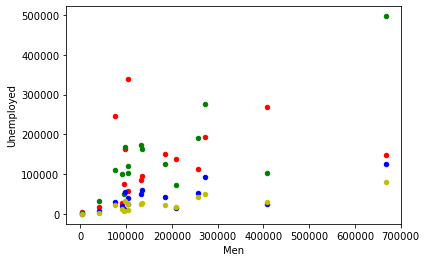

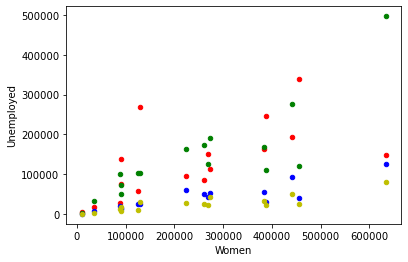

In [17]:
#comparison of men/women recent grads and comparing their job circumstances

men1 = category.plot(kind='scatter', x='Men', y='College_jobs', color='r')
men2 = category.plot(kind='scatter', x='Men', y='Non_college_jobs', color ='g', ax=men1)
men3 = category.plot(kind='scatter', x='Men', y='Low_wage_jobs', color='b', ax=men1)
men4 = category.plot(kind='scatter', x='Men', y='Unemployed', color='y', ax=men1)

women1 = category.plot(kind='scatter', x='Women', y='College_jobs', color='r')
women2 = category.plot(kind='scatter', x='Women', y='Non_college_jobs', color ='g', ax=women1)
women3 = category.plot(kind='scatter', x='Women', y='Low_wage_jobs', color='b', ax=women1)
women4 = category.plot(kind='scatter', x='Women', y='Unemployed', color='y', ax=women1)

From the `recent_grads` dataset, we can impose certain groupings, allowing us to see the relationship between popularity and employment across a wide range of conditions. Firstly in this section, we took a look at distributions across the major categories of `Engineering`, `Biology`, and `Arts`, which can have interesting outcomes in regards to employment in that particular field. Furthermore, we can also group `recent_grads` by gender, allowing us to explore the distribution of men and women employment statuses.

### Comparing `all_ages` dataset

In [18]:
all_age_cat = all_ages.groupby('Major_category').sum()
all_age_cat = all_age_cat.drop(['Major_code', 'Unemployment_rate', 'Median', 'P25th', 'P75th'], axis=1)
all_age_cat.head()

,Total,Employed,Employed_full_time_year_round,Unemployed
Major_category,,,,
Agriculture & Natural Resources,632437,480415,389188,18551
Arts,1805865,1308695,854606,104125
Biology & Life Science,1338186,947058,682524,57335
Business,9858741,7529851,6171326,434397
Communications & Journalism,1803822,1423041,1068187,101199


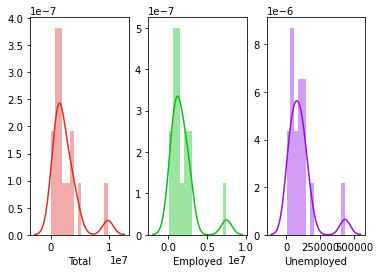

In [19]:
#plotting the distributions of all grad job circumstances
plt.subplot(1,3,1)
sns.distplot(all_age_cat['Total'], bins=15, color='#DE2D26')
plt.subplot(1,3,2)
sns.distplot(all_age_cat['Employed'], bins=15, color='#0CBD18')
plt.subplot(1,3,3)
sns.distplot(all_age_cat['Unemployed'], bins=15, color='#940CE8')

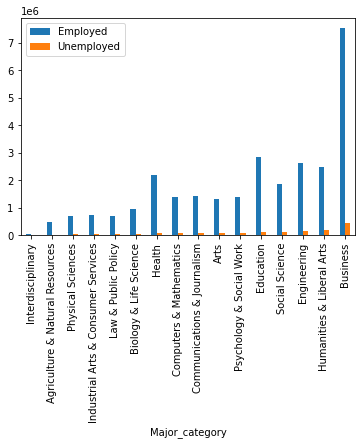

In [20]:
#comparing employed vs unemployed for all grads
all_age_cat[['Employed', 'Unemployed']].sort_values(by='Unemployed').plot(kind='bar')

In [21]:
outcome, predictors = patsy.dmatrices('Employed ~ Total', all_age_cat)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Employed   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1139.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):           8.19e-15
Time:                        21:09:35   Log-Likelihood:                -216.72
No. Observations:                  16   AIC:                             437.4
Df Residuals:                      14   BIC:                             439.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.222e+04   7.35e+04     -0.574      0.5

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


### Exploring `grad_students` dataset

In [22]:
#Taking a look at the grad_students dataset, we decide to explore the mean values of each major category
avg_grad = trim_grad_students.groupby('Major_category').mean().sort_values(by='Grad_total', ascending=False)
avg_grad.head()

,Major_code,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate
Major_category,,,,,,,,,,,,
Education,2387.687500,246581.250000,3371.500000,152322.875000,105089.125000,4183.625000,0.027043,280518.187500,166239.000000,111792.937500,6992.187500,0.046368
Business,6213.000000,209145.923077,4086.153846,163422.692308,138962.538462,7845.692308,0.050391,718894.923077,547988.615385,456856.307692,30247.846154,0.050432
Social Science,5348.000000,204412.222222,3899.666667,153507.777778,123423.666667,6725.333333,0.045818,271076.555556,191160.555556,151766.000000,12376.666667,0.060757
Humanities & Liberal Arts,4048.600000,188398.333333,3148.333333,132438.133333,96572.866667,5668.866667,0.044186,229928.066667,152646.400000,110507.200000,10282.600000,0.066112
Psychology & Social Work,5258.111111,181171.666667,3116.000000,139547.555556,102414.444444,5492.000000,0.042032,199511.333333,141223.777778,103931.777778,9691.555556,0.073946


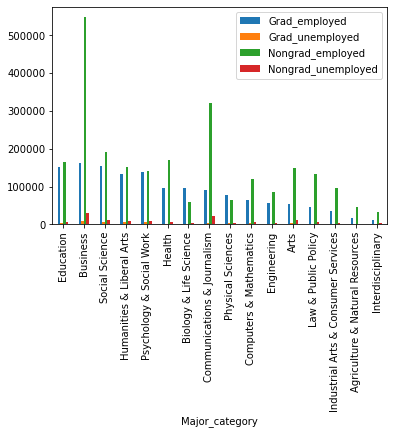

In [23]:
#Here we can see the average count of employed and unemployed individuals and whether or not they were graduate students.
avg_grad[['Grad_employed', 'Grad_unemployed', 'Nongrad_employed', 'Nongrad_unemployed']].plot(kind='bar')

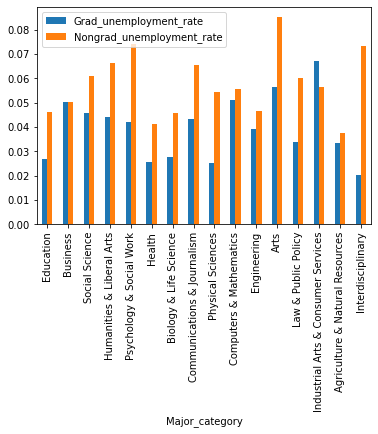

In [24]:
#plotting average unemployment rates grouped by major category
avg_grad[['Grad_unemployment_rate', 'Nongrad_unemployment_rate']].plot(kind='bar')

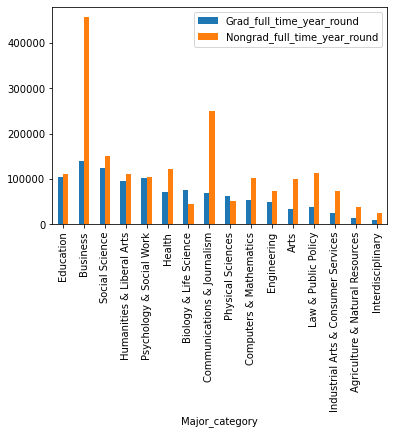

In [25]:
#plotting average counts of full time workers (grouped by grad/nongrad) grouped by major category
avg_grad[['Grad_full_time_year_round', 'Nongrad_full_time_year_round']].plot(kind='bar')

These above graphs are comparing the average counts of grad students versus nongrad students. The first graphs the average counts of each category, grad and nongrad students, separated by employed and unemployed. Furthermore, we can plot the differing unemployment rates of grad versus nongrad students, broken down by major category. Finally, we can look at the average counts of those who work fulltime and break them down between grad and nongrad students.

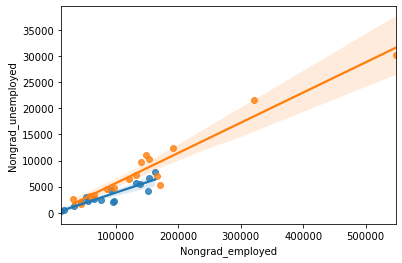

In [26]:
#plotting the relationship between employed and unemployed individuals, grouped by grad and nongrad
sns.regplot(data=avg_grad, x='Grad_employed', y='Grad_unemployed')
sns.regplot(data=avg_grad, x='Nongrad_employed', y='Nongrad_unemployed')

In [27]:
outcome, predictors = patsy.dmatrices('Grad_unemployed ~ Grad_employed', avg_grad)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        Grad_unemployed   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     64.05
Date:                Fri, 26 Feb 2021   Prob (F-statistic):           1.36e-06
Time:                        21:09:36   Log-Likelihood:                -131.56
No. Observations:                  16   AIC:                             267.1
Df Residuals:                      14   BIC:                             268.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -146.1686    496.136     -0.295

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [28]:
outcome, predictors = patsy.dmatrices('Nongrad_unemployed ~ Nongrad_employed', avg_grad)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     Nongrad_unemployed   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     205.4
Date:                Fri, 26 Feb 2021   Prob (F-statistic):           9.28e-10
Time:                        21:09:37   Log-Likelihood:                -143.02
No. Observations:                  16   AIC:                             290.0
Df Residuals:                      14   BIC:                             291.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -135.4601    797.327  

From the datasets, we know that the columns representing the counts of grad/nongrad students and their employment statuses are subsets of the `Grad_total` and `Nongrad_total` columns. We would expect the average count of employed and unemployed individuals to increase as the popularity of a certain major category increases. Checking the regression results between the two groups of employed vs unemployed data, we would be able to see if both categories increase at the same rate, in which there would be a high correlation between the two. 

As total increases, we would be able to see whether or not the average counts of employed vs unemployed individuals increase at different rates. 